In [85]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from scipy.linalg import eig
from scipy.integrate import solve_ivp
#motor DC
# constantes
J = 1
R = 3.8
L = 0.0037
Ke = 0.2
Kt = 0.2
c = 0.001
Tl = 0.07
V = 10

In [86]:
# Representacion en espacio de estados
A = [[-c/J,Kt/J],[-Ke/L,-R/L]]
l = eig(A)
p1 = l[0][0]
p2 = l[0][1]
print(p1)
print(p2)

(-0.011526433928565893+0j)
(-1027.016500593098+0j)


In [87]:
B=[[-1/J,0],[0,1/L]]
C = [[0,1],[1,0]]
D = [[0,0],[0,0]]
sys = ct.ss(A,B,C,D)

In [88]:
Tsimu = 1/np.abs(p1)*10
sal = ct.step_response(sys,Tsimu)
sal.outputs

array([[[ 0.00000000e+00,  4.38657318e-01,  8.35216477e-01,
          1.19367578e+00,  1.51769571e+00,  1.81058507e+00,
          2.07533477e+00,  2.31464834e+00,  2.53096961e+00,
          2.72650756e+00,  2.90325900e+00,  3.06302885e+00,
          3.20744863e+00,  3.33799313e+00,  3.45599541e+00,
          3.56266050e+00,  3.65907763e+00,  3.74623137e+00,
          3.82501172e+00,  3.89622316e+00,  3.96059289e+00,
          4.01877822e+00,  4.07137334e+00,  4.11891532e+00,
          4.16188965e+00,  4.20073517e+00,  4.23584857e+00,
          4.26758841e+00,  4.29627882e+00,  4.32221275e+00,
          4.34565506e+00,  4.36684512e+00,  4.38599933e+00,
          4.40331327e+00,  4.41896376e+00,  4.43311061e+00,
          4.44589828e+00,  4.45745737e+00,  4.46790590e+00,
          4.47735058e+00,  4.48588785e+00,  4.49360489e+00,
          4.50058051e+00,  4.50688594e+00,  4.51258557e+00,
          4.51773760e+00,  4.52239464e+00,  4.52660426e+00,
          4.53040943e+00,  4.53384901e+0

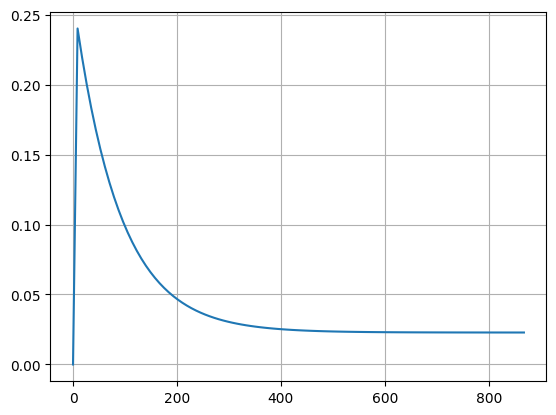

In [89]:
plt.plot(sal.time,sal.outputs[0][1])
plt.grid()

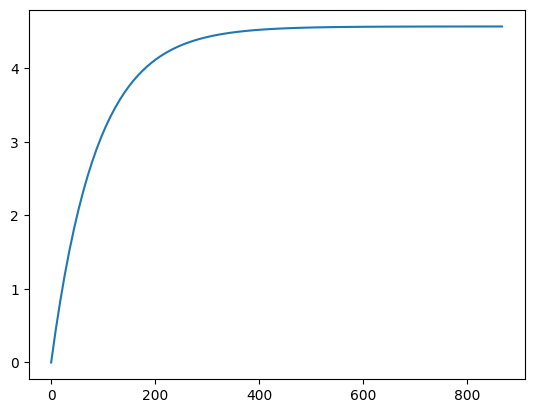

In [90]:
plt.plot(sal.time,sal.outputs[1][1])

In [105]:
# Solucion numerica por Runge Kutta
def f(t,x):
    s=[0,0]
    w = x[0]
    i = x[1]
    if t<=200:
        Tl = 0.07
    else:
        Tl = 0.07/2
        
    s[0]=-c/J*w+Kt/J*i-Tl/J
    s[1]=-Ke/L*w-R/L*i+V/L
    return s




Text(0.5, 1.0, 'Velocidad angular')

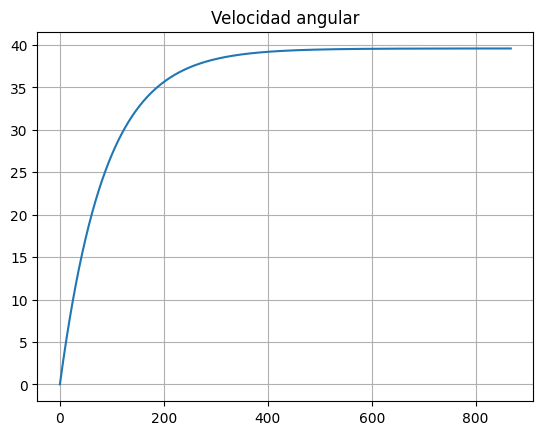

In [92]:
salida = solve_ivp(f,[0,Tsimu],[0,0])
salida.t
salida.y
plt.plot(salida.t,salida.y[0])
plt.grid()
plt.title("Velocidad angular")

Text(0.5, 1.0, 'corriente')

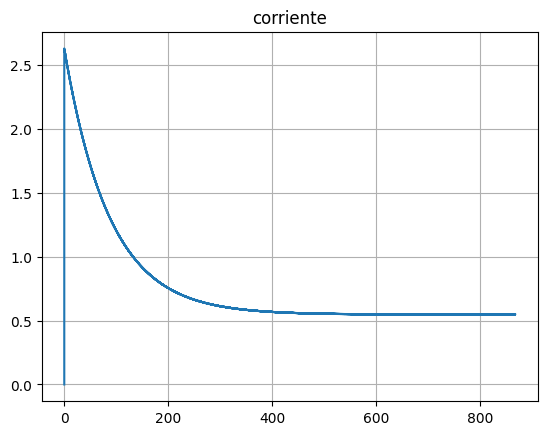

In [93]:

plt.plot(salida.t,salida.y[1])
plt.grid()
plt.title("corriente")

In [94]:
salida.t[-1]
w0=salida.y[0][-1]
i0=salida.y[1][-1]

Text(0.5, 1.0, 'Velocidad angular')

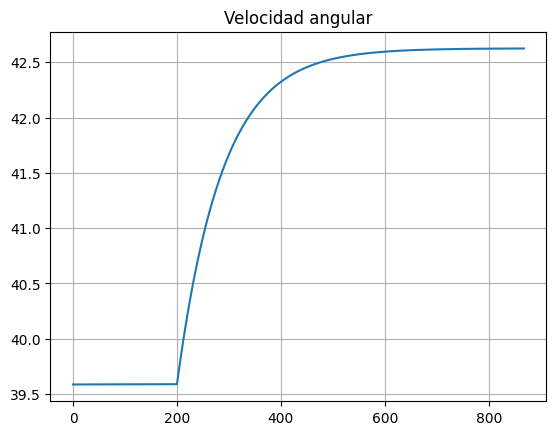

In [106]:
salida = solve_ivp(f,[0,Tsimu],[w0,i0])
salida.t
salida.y
plt.plot(salida.t,salida.y[0])
plt.grid()
plt.title("Velocidad angular")

(0.0, 0.6)

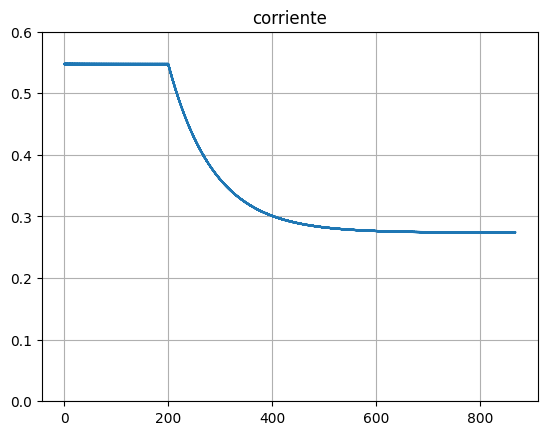

In [101]:
plt.plot(salida.t,salida.y[1])
plt.grid()
plt.title("corriente")
plt.ylim([0,0.6])

In [107]:
(salida.y[0][-1]-w0)/w0

0.07671523109271006